<a href="https://colab.research.google.com/github/manavgupta1261/Machine-Learning/blob/main/2348529_MLComponent2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

df = pd.read_csv('/2015.csv')

In [46]:
df.head

<bound method NDFrame.head of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.

In [47]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [26]:
cols=[x for x in df.columns]

In [27]:
for i in cols:
  print(df[i].describe().T)

count             158
unique            158
top       Switzerland
freq                1
Name: Country, dtype: object
count                    158
unique                    10
top       Sub-Saharan Africa
freq                      40
Name: Region, dtype: object
count    158.000000
mean      79.493671
std       45.754363
min        1.000000
25%       40.250000
50%       79.500000
75%      118.750000
max      158.000000
Name: Happiness Rank, dtype: float64
count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64
count    158.000000
mean       0.047885
std        0.017146
min        0.018480
25%        0.037268
50%        0.043940
75%        0.052300
max        0.136930
Name: Standard Error, dtype: float64
count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max    

In [28]:
bin_edges = [0, 4.526000, 6.243750, 7.587000]
bin_labels = ['Low', 'Medium', 'High']
df['Binned_Happiness'] = pd.cut(df['Happiness Score'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [29]:
df.head

<bound method NDFrame.head of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651  1.

In [ ]:
hap_bin_counts = df['Binned_Happiness'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
hap_bin_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Countries in happiness bin')
plt.xlabel('Happiness')
plt.ylabel('Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
region_encoded = pd.get_dummies(df['Region'], prefix='Region')
df = pd.concat([df, region_encoded], axis=1)
df.drop('Region', axis=1, inplace=True)

In [32]:
df.to_csv('encoded_data.csv', index=False)

In [37]:
df.head

<bound method NDFrame.head of          Country  Happiness Rank  Happiness Score  Standard Error  \
0    Switzerland               1            7.587         0.03411   
1        Iceland               2            7.561         0.04884   
2        Denmark               3            7.527         0.03328   
3         Norway               4            7.522         0.03880   
4         Canada               5            7.427         0.03553   
..           ...             ...              ...             ...   
153       Rwanda             154            3.465         0.03464   
154        Benin             155            3.340         0.03656   
155        Syria             156            3.006         0.05015   
156      Burundi             157            2.905         0.08658   
157         Togo             158            2.839         0.06727   

     Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                     1.39651  1.34951                   0.94143

In [41]:
from scipy.stats import chi2_contingency
data_happ = df['Happiness Rank']
data_reg = df['Region_Australia and New Zealand']
contingency_table = pd.crosstab(data_happ, data_reg)
chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)

Chi-square statistic: 158.00000000000006
P-value: 0.4402002812456581
Degrees of freedom: 156
Expected frequencies:
[[0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.98734177 0.01265823]
 [0.987341

In [42]:
categories = ['Happiness Rank', 'Region_Australia and New Zealand']
differences = [obs - exp for obs, exp in zip(), expected]
fig, ax = plt.subplots()
ax.bar(categories, expected, label='Expected')
ax.bar(categories, differences, bottom=expected, label='Difference', color='orange')
ax.set_ylabel('Frequency')
ax.set_title('Stacked Bar Plot of Chi-Square Test Results')
ax.legend()

plt.tight_layout()
plt.show()


SyntaxError: ignored

In [43]:
selected_columns = ['Economy (GDP per Capita)', 'Family']
selected_data = df[selected_columns]
covariance_matrix = np.cov(selected_data, rowvar=False)
print("Covariance Matrix between GDp per Capita and Family is:")
print(covariance_matrix)

Covariance Matrix between GDp per Capita and Family is:
[[0.16250636 0.07085235]
 [0.07085235 0.07418492]]


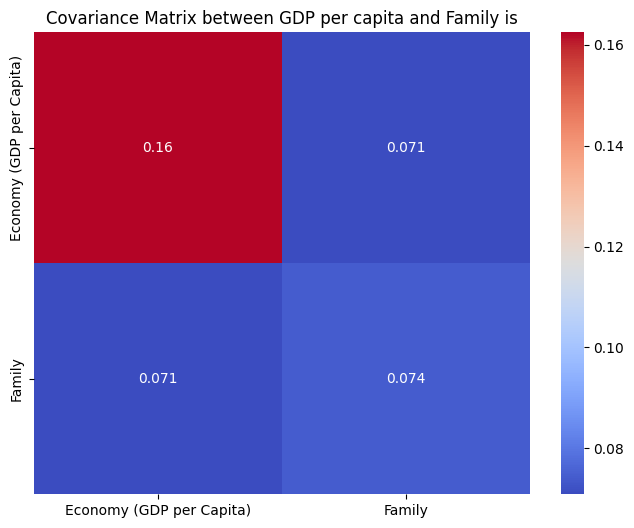

In [44]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', xticklabels=selected_columns, yticklabels=selected_columns)
plt.title('Covariance Matrix between GDP per capita and Family is')
plt.show()